Name Manav Bilakhia

Date 17th September 2022

## Place All Library Imports in This Section

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep

# The Logistic Map

## The Basic Map

### The Function Itself

<font color = blue>
Start by creating a function of two variables "a" and "x", which outputs the function $F_a(x) = ax(1-x)$.

In [2]:
def l_map(a, x):
    return (a*x*(1-x)) #returns the value
l_map(2, 0.5) # test


0.5

This function calculates a point on a logistic map

### The Map Function: Version 1

<font color = blue>
Now create a function that takes three inputs: an intial value $x_0$, a parameter $a$, and an integer $m$, and outputs an array of $m+1$ values $\{x_0, x_1, x_2, \dots, x_m\}$, where

$$
x_{k+1} = F_a(x_k)
$$

Do this starting with a list of just one element, for example "mylist = np.array([x0])".  Then use a "for" loop to sequentially create the later values of $x_k$, and append each to the array "mylist".

Confirm that your code is working by generating a list of 5 elements using the initial value $x_0 = 0.5$, with $a = 0.5$, and $m = 5$.  Your output should be

$$
\{0.5, 0.125, 0.0546875, 0.0258484, 0.0125901, 0.0062158\}
$$

In [3]:
def map_V1(x0, a , m):
    mylist = np.array([x0]) #declare an arrayu with the one and only element being x0

    for i in range(m):
        mylist = np.append(mylist, l_map(a, mylist[i])) # adding more points to the array
    return mylist
map_V1(0.5, 0.5, 5)# test


array([0.5       , 0.125     , 0.0546875 , 0.02584839, 0.01259012,
       0.00621581])

map_V1 calls l_map which calculates a point on the map. This point is then appended onto an array and returns the array of points. 

### The Map Function: Version 2

<font color = blue>
Now create a second version of the same code.  This time, instead of starting with a list that has a single element, start by creating a list with $m+1$ elements, each of which is equal to $x_0$.  Then, inside your "for" loop, sequentially replace the elements of this list with the values $x_k$ which are computed.  Again confirm that your code works as desired.

In [4]:
def map_V2(x0, a , m):
    mylist = np.array([x0 for i in range (m+1)]) #declaring an array of size m+1 with all elements being equal to x0
    for i in range(1,m+1):
        mylist[i] = l_map(a, mylist[i-1]) #replacing the default values with actual points on the logistic map
    return mylist
map_V2(0.5, 1.5, 10) #test

array([0.5       , 0.375     , 0.3515625 , 0.34194946, 0.33753004,
       0.33540527, 0.33436286, 0.33384651, 0.33358953, 0.33346133,
       0.33339731])

map_V2 is somewhat similar to map_V1 as they achieve the same final goal of returning an array of points on the logistic map. map_V2 calls l_map which again calculates a point on the map. Instead of appending the calculated value to a list, it replaces the default value.

### Efficiency and Timing

<font color = blue>
We want to compare the efficiency of the two functions we have just created.  In order to do this, generate lists of how long it takes to run each function (using the time.time function you explored last time), with $x_0 = 0.5$ and $a = 0.5$, and $m = \{1000, 2000, 3000, \dots, 30000\}$.  

Create a plot showing each of these time lists.

In the rest of the assignment, use the more efficient of your two modules!

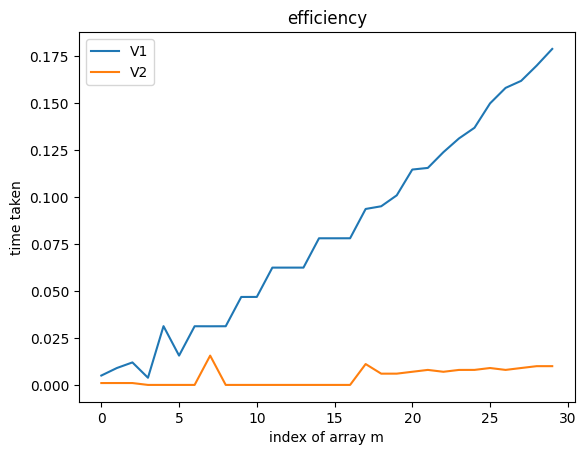

In [5]:
def efficiency(x0, a, m):
    time_array_v1 = np.empty(0) #declaring an empty array
    time_array_v2 = np.empty(0) #delcaring an empty array
    start_time_v1, start_time_v2, end_time_v1, end_time_v2 = 0,0,0,0 #variable decleration 
    for i in range(m.size):
        start_time_v1 = time.time()# start time for the first function
        map_V1(x0, a, m[i])
        end_time_v1 = time.time() # end time for the first function
        elapsed_time_v1 = end_time_v1-start_time_v1 #calculating time for the function1 to run
        time_array_v1 = np.append(time_array_v1, elapsed_time_v1) #storing the calculated time in an array
        start_time_v2 = time.time() # start time for the second function
        map_V2(x0, a, m[i]) 
        end_time_v2 = time.time() # end time for the second function
        elapsed_time_v2 = end_time_v2-start_time_v2 #calculating time for the function2 to run
        time_array_v2 = np.append(time_array_v2, elapsed_time_v2) #storing the calculated time in an array
    plt.plot(time_array_v1,label = "V1")
    plt.plot(time_array_v2, label = "V2")
    plt.xlabel("index of array m")
    plt.ylabel("time taken")
    plt.title("efficiency")
    plt.legend()
    plt.show()
    
    #test
m = np.empty(0, dtype = int)    
for i in range(1000, 31000, 1000):
    m = np.append(m, int(i))
efficiency(0.5, 0.5, m)
        
        


The above graph plots the time it took for map_V1 and map_V2 to run at different values of m ranging from 1000 to 30000 at a 1000 step. We see that V2 is must faster than V1 concluding experimentally that appending an element to a numpy array is much slower that replacing an already existing element as appending includes 3 different operations i.e. increasing the size of an array, assigning a default empty value to the new index and then replacing it with the actual value on the other hand map_V2 just needs replace elements in an already existing array. For the rest of the assignment we will be using map_V2 as it is the more efficient function of the two.

## Convergence Behaviors

### Fixed Points

<font color = blue>
Now you want to confirm that $x_0 = 0$ and $x_0 = \frac{a - 1}{a}$ are fixed points of the logistic map.  Do this by generating tables with $m = 10$ that start at these points, and showing they stay the same.  Do this for the values of a:

$$
a = \{0.5, 1.5, 2.5, 3.5\}
$$

(For the first, you only need to check $x_0 = 0$, as the other is not considered a fixed point unless $a \ge 1$.)

In [6]:
print(map_V2(0, 0.5, 10))
print(map_V2((0), 1.5, 10))
print(map_V2((0), 2.5, 10))
print(map_V2((0), 3.5, 10))
print(map_V2((0.5/1.5), 1.5, 10))
print(map_V2((1.5/2.5), 2.5, 10))
print(map_V2((2.5/3.5), 3.5, 10))

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
[0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
[0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571
 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571]


Here we call our more efficient map_V2 function which returns an array of points on the logistic map. Here we notice that when the value of $x_{0} = 0$,all the other points on the logistic map are also 0 regardless of what value we have for $a$. When we use a value for $a$ from the given list and an appropriate value for $x_{0}$. We see that the all the elements in the array of points are the same which means we are at a fixed point. 

### x = 0 Fixed Point Stability

<font color = blue>
Confirm that when $a < 1$, an arbitrarily chosen initial point will quickly converge to zero.  The easiest way to see this is by plotting the results.  Create a graph showing two lists of points for $m = 100$, starting at two different initial values $x_0$, with two different values $0 < a < 1$.

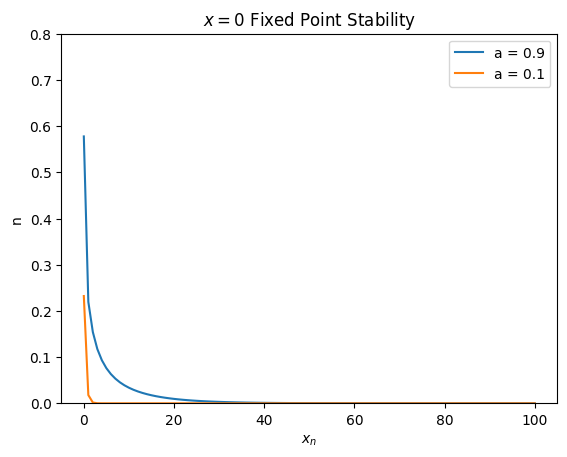

In [7]:
array1 = map_V2(random.uniform(0, 1),.9 , 100) 
array2 = map_V2(random.uniform(0, 1), .1, 100)
plt.plot(array1, label = "a = 0.9")
plt.plot(array2, label = "a = 0.1")
plt.xlabel("$x_n$")
plt.ylabel("n")
plt.legend()
plt.title("$x = 0$ Fixed Point Stability") #title
plt.ylim(0, 0.8)
plt.show()

This graph shows us that for a given value of $x_{0}$ and a random value of $a$ where $0 < a < 1$ we see that the graph tends to 0. this happens because $x_{0} > x_{1}$ thereby they converge at 0 and the only fixed point that we have in this condition is 0.

### ${\pmb x = \frac{a - 1}{a}}$ Fixed Point Stability

<font color = blue>
Now do the same for the region $1 < a < 3$, showing that arbitrarily chosen initial values converge to the second fixed point $\frac{a - 1}{a}$.  Choose two values of $a$, one of which has $1 < a < 2$ and the other of which has $2 < a < 3$, and two arbitrary values of $x_0$.  For each value of $a$, compute what the theoretical fixed point should be, and display that on your plot as a horizontal line (so you can confirm the convergence more readily.)

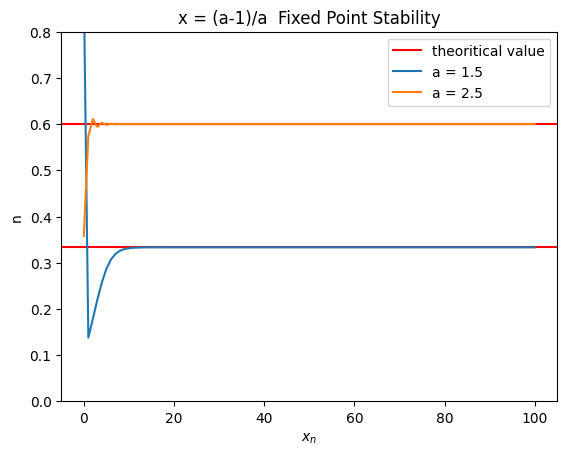

In [8]:
array1 = map_V2(random.uniform(0,1), 1.5, 100) 
array2 = map_V2(random.uniform(0,1), 2.5, 100)
plt.axhline(y = array1[-1], color = 'r', linestyle = '-', label = "theoritical value") #plots the line of the fixed point
plt.axhline(y = array2[-1], color = 'r', linestyle = '-') #plots the line of the fixed point
plt.plot(array1, label = "a = 1.5")
plt.plot(array2, label = "a = 2.5")
plt.xlabel("$x_n$")
plt.ylabel("n")
plt.legend()
plt.ylim(0, 0.8)
plt.title("x = (a-1)/a  Fixed Point Stability")
plt.show()

On the other hand when we choose a value of $a$ such that $1 < a < 3$ we see that for a random value of $x_{0}$ we see that there is another fixed point at $\frac{a - 1}{a}$ which may or may not be 0. This can be seen in the graph above. 

### Period 2 Convergence

<font color = blue>
Now pick a value of $a$ in the region $3 < a < 1 + \sqrt{6}$, along with an arbitrary initial value $x_0$.  For this value of $a$, determine (theoretically) what the fixed points of $F_a^{(2)}(x)$ should be.  Plot These values as horizontal lines together with the series that results from your chosen initial value.  You should see that after a large number of mappings the result essentially alternates between the two fixed points.

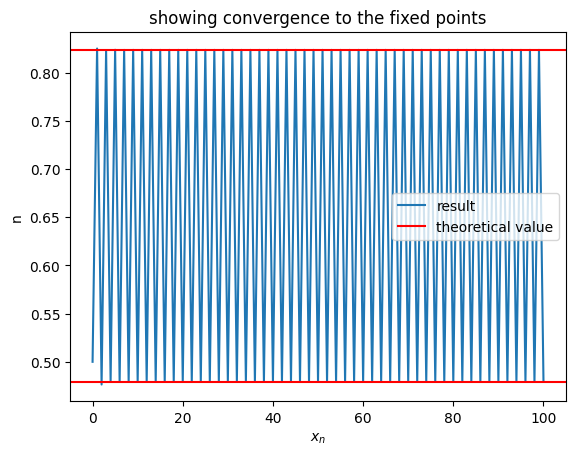

In [9]:
x0 = 0.5
a = 3.3
m = 100
array1 = map_V2(x0, a, m)
line1 = (((1 + a) + math.sqrt((a+1)*(a-3)))/(2*a))
line2 = (((1 + a) - math.sqrt((a+1)*(a-3)))/(2*a))
plt.plot(array1, label = "result")
plt.axhline(y = line1, color = 'r', linestyle = '-',label = "theoretical value") #plots the line of the fixed point
plt.axhline(y = line2, color = 'r', linestyle = '-') #plots the line of the fixed point
plt.xlabel("$x_n$")
plt.ylabel("n")
plt.title ("showing convergence to the fixed points")
plt.legend()
plt.show()

Here we pick a random value for $a$ where $3 < a < 1 + \sqrt{6}$ and an arbitrary value for $x_{0}$. We see that these values continuously oscillate between fixed points. The fixed points can be calculated by using the formula $\frac{(1+a)\pm \sqrt{(a+1)(a-3)}}{2a}$.The theoretically values in this case are 0.8236032832060688 and 0.4794270198242342

### Period 4 Convergence

<font color = blue>
Now pick a value of $a$ in the range $1 + \sqrt{6} < a < 3.5441$, and show that after a large number of mappings we essentially cycle through four different values.  This time, take your list out to $m = 300$ (so that convergence behavior is easier to see.)  For your particular value of $a$, determine what these four limiting values are by examining the last points in your series.

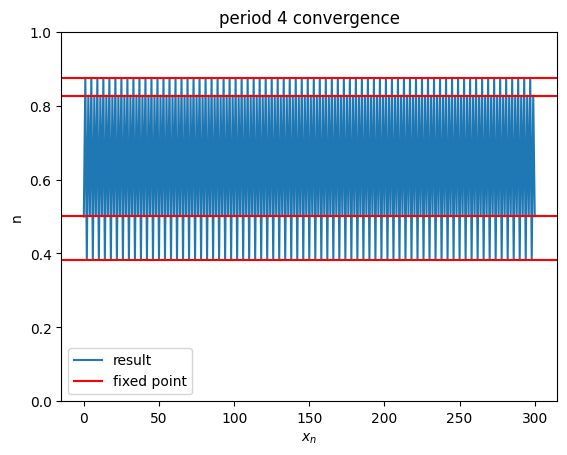

In [10]:
# last 4 points in array1 0.87499726 0.38281968 0.82694071 0.50088421
x0 = 0.5
a = 3.5
m = 300
array1 = map_V2(x0, a, m)
plt.plot(array1,label = "result")
plt.axhline(y = 0.87499726, color = 'r', linestyle = '-',label = "fixed point") #plots the line of the fixed point
plt.axhline(y = 0.38281968, color = 'r', linestyle = '-')#plots the line of the fixed point
plt.axhline(y = 0.82694071, color = 'r', linestyle = '-')#plots the line of the fixed point
plt.axhline(y = 0.50088421, color = 'r', linestyle = '-')#plots the line of the fixed point
plt.legend()
plt.xlabel("$x_n$")
plt.ylabel("n")
plt.title ("period 4 convergence")
plt.ylim(0, 1)
plt.show()

Here again we pick a random value for $a$ where $1 + \sqrt{6} < a < 3.5441$ and an arbitrary value for $x_{0}$. We see that these values continuously oscillate between all four fixed points For a period 4 convergence we do not have a theoretical formula hence the fixed points must be determined experimentally. Although in the graph it seems to oscillate more between the two inner fixed points but that is not the case. The middle dense region is formed because of the overlapping oscillation between the inner and outer fixed points. The fixed points for this one are 0.87499726, 0.38281968, 0.82694071 and 0.50088421. 

## Building a Bifurcation Diagram

### Modifying the Original Function

<font color = blue>
We now want to actually create the bifurcation diagram.  However, to do so efficiently we need to go back to our original mapping function, and modify it.  

First, we want the output of the function to be just the final result of the mapping, $x_N$.  And since we need only this last element, there's no reason to keep track of the entire list as we go (and leaving this out makes things much more efficient.)

<font color = blue>
Second, instead of the user specifying the initial point $x_0$, we want the function to generate a random initial point in the range $[0, 1]$, automatically.  (To do this you will need to use the "random" library, with the function random.uniform).

Create your final version of the mapping function, and test it out to be sure it's working properly.

In [11]:
def map_V2_1(a , m):
    x0 = random.uniform(0, 1) #chooses a random value between 0 and 1
    mylist = np.array([x0 for i in range (m+1)])
    for i in range(1,m+1):
        mylist[i] = l_map(a, mylist[i-1])
    return mylist[-1] #returns the last element of the array instead of the entire array
map_V2_1(3.5, 300)# test

0.8269407065914387

Here I have now defined a new mapping function that only returns the last element in the array instead of the entire array and instead of defining one particular value for $x_{0}$, it is now randomized in the range $1 > x_{0}>0$ Everything else in this function runs just like the map_V2 function

### A Data Generating Function

<font color = blue>
Now we want to create the function that will actually generate our data.  This function will take two inputs: the total number of data points $P$, and the number of mappings we will use to generate each data point $m$.  

Inside the function, begin by generating two arrays of $P$ elements, each of which zero.  (One will hold your values of $a$ and the other will hold your values of $x_m$.)

Then, inside a loop that runs "P" times, generate a random value for $a$ in the range $[0, 4]$, use that value of $a$ and the function from the previous section to generate a final point from the mapping $x_m$.  Finally, replace the next element of each of your arrays with $a$ and $x_m$ respectively.

After the loop is complete, return both data lists.

Confirm your code works as desired.

In [12]:
def data_generator(P, m): #P is the number of elements and m is the number of mappings
    arr1 = np.zeros(P)
    arr2 = np.zeros(P)
    for i in range (P):
        a = random.uniform(0,4)
        arr1[i] = a
        arr2[i] = map_V2_1(a , m)
    return (arr1, arr2) # returns a tuple of two arrays
print(data_generator(2000, 1000)) #test     

(array([3.04500148, 2.24962152, 3.35703254, ..., 2.88846037, 3.20819777,
       0.23953869]), array([0.73426113, 0.55548078, 0.46317612, ..., 0.6537948 , 0.80173048,
       0.        ]))


We now move on to generate the data to make a bifurcation diagram. For this we first select the value of $a$ such that $ 4 > a > 0 $. We then store the value of a in a numpy array and the value of $x_{0}$ in another numpy array. The data_generator function is dependent on two parameters, one of them being the number of points (P) we want in our bifurcation diagram and the number of mappings for each point (m). It returns these 2 arrays. 

### * The Bifurcation Diagram

<font color = blue>
You now want to actually generate (and discuss) the bifurcation diagram.  The diagram is better the more data points you use, but a decent diagram can be created with $P = 200000$ and $m = 1000$.

Begin by using more modest values, and the "time" function, to estimate how long it will take to generate the full data set.  Having done so, run your code and create a plot.

** Some sections of each assignment will be marked with an asterist (as this one is.)  These sections are considered "results" sections.  In them, make sure that all graphs are labeled carefully, and discussions are thorough and focus on interpreting the graphical results.**

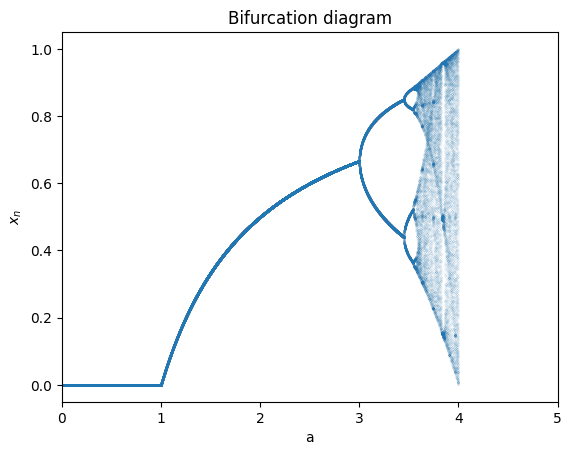

In [13]:
# this cell will take considerable more time to run do not interrupt it. 
arr1, arr2 = data_generator(200000, 1000)

plt.scatter(arr1,arr2, s = .001)# arg 3 is the sze of the point
plt.xlim(0, 5)
plt.title("Bifurcation diagram")
plt.xlabel("a")
plt.ylabel("$x_{n}$")
plt.show()

For a given value of a where $0<a<1$, $x_{n} = 0$ regardless of what value we choose for a. 
For a given value of a where $1<a<3$, $x_{n} = \frac{(a-1)}{a}$. For example when a = 2.5, the value of $x_{n} = 0.6$.
For a given value of a where $3<a<1+ \sqrt{6}$, $x_{n} = \frac{(1+a)\pm \sqrt{(a+1)(a-3)}}{2a}$. We also start to see a split at a = 3 as in this region we have 2 fixed points. 
For a given value of a where $1+ \sqrt{6} <a<3.5442$ each value of a will have four different values of $x_n$. We can see this happening at a = 1+ \sqrt{6}. For this region, the function to calculate the fixed points becomes really complicated hence we decide to do it experimentally. 
After a = 3.5441, we see this splits even more as there are more end points of the order $2^n$. We start to see the chaotic patterns here as x_{n} could take any pseudo random value as there is still some pattern behind these values which can be clearly seen as we zoom in to the diagram. These chaotic regions also have gaps which also form a symmetrical pattern. The bifurcation diagram ends at a = 4 as there are no further splits after that.

## The Basic Bisection Routine

### Bisection Module

<font color = blue>
Write your bisection routine as a function.  It should take, as inputs, a function "F" (the function whose roots we are interested in), an initial bracketing, (that is, a pair $x_{\ell}$ and $x_r$), and a tolerance $\epsilon$ that specifies how close to zero the function should be before the module exits.

In [14]:
def bisection (f, xl, xr, e): #f is a function that is taken as parameter, xl is the left bracketing, xr it the right bracketing, e is the tolerance
    xm = (xl+xr)/2
    while (abs(f(xm)) > e):
        if ((f(xl))*(f(xm)) < 0):
            xr = xm
            xm = (xl+xr)/2
        else:
            xl = xm
            xm = (xl+xr)/2
    return xm

Our bisection function takes in another function f and the initial bracketing which is xl and xr along with the tolerance. The bisection function keeps on iterating as long as the mid value (xm) is not in a tolerable range which is defined while calling the function. After the function is done iterating and finishes the loop, it returns the root of the function f which is our mathematical $f(x)$. 

### Simple Test

<font color = blue>
Test your code on the simple function

$$
f(x) = x^3 - \pi x^2 - \sqrt{2} x + 5
$$

Remember to plot it first, so that you know how to start your initial bracketing.  Find all three roots, using $\epsilon = 10^{-8}$.

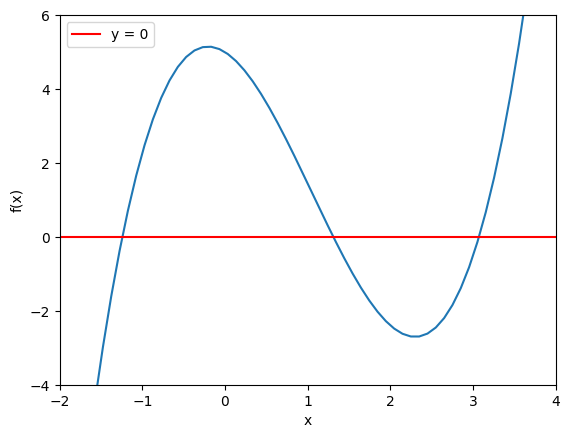

x =  -1.2414989019744098
x =  1.3109305910766125
x =  3.0721609629690647


In [15]:
def f(x):
    return (math.pow(x, 3)-(math.pi * math.pow(x, 2))-(math.pow(2 , (1/2))*x)+5)
xvalues  = np.linspace(-5,10,150) 
yvalues = np.array([f(x) for x in xvalues])
plt.xlim(-2, 4)
plt.ylim(-4, 6)
plt.plot(xvalues, yvalues)
plt.axhline(y = 0.0, color = 'r', linestyle = '-',label = "y = 0")#plots the line of the fixed point
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

print("x = ", bisection(f, -2, 1, math.pow(10, -8))) #test
print("x = ",bisection(f, 1, 2, math.pow(10, -8))) # call bisection on a test function for different bracketing
print("x = ",bisection(f, 3, 4, math.pow(10, -8)))

Here we define a test function to check if our bisection function can get all the roots for the bracketing. We can compare the the values that our bisection function calculated along with the visual intersection of the two graphs plotted above. We see that the roots are reasonable and out bisection function works. 

## The Range Finder

<font color = blue>
In class we showed that the (dimensionless) range of a projectile $r(u, \theta_0)$ would satisfy the equation

$$
0 = \frac{ur(u\sin\theta_0 + 1)}{\cos\theta_0} + \ln\left[1 - \frac{ur}{\cos\theta_0}\right]
$$

where $\theta_0$ is the initial angle and $u$ is the ratio of initial speed to terminal velocity.

### Part 1: A Specific Angle and u-value

<font color = blue>
Find the value of the range $r$ for the angle $\theta_0 = \frac{\pi}{6}$ and the velocity $u = 0.01$.  Remember to plot the function you are trying to root-find first, so that you know how to start your initial bracketing.  How does your result compare with what you would get in the drag-free case for the same initial angle?  Does this make sense?

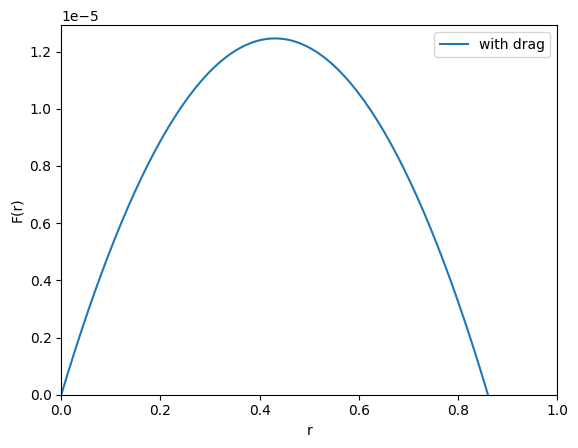

With Drag =  0.8602853948175835
Without drag =  0.8660254037844386


In [16]:
def calc_r (r):
    return (((u*r*((u*math.sin(theta))+1))/math.cos(theta))+ math.log(1-((u*r)/(math.cos(theta)))))
theta = math.pi/6
u = 0.01
xvalues  = np.linspace(0,1,150)
yvalues_with_drag = np.array([calc_r(x) for x in xvalues])

plt.xlim(0, 1)

plt.plot(xvalues, yvalues_with_drag,label = "with drag")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 9.5**(-5))
plt.xlabel("r")
plt.ylabel("F(r)")
plt.show()

print("With Drag = ", bisection(calc_r, 0.8, 0.9, math.pow(10, -17)))
print("Without drag = ", math.sin(2*theta))


Here we now want to define and test the a function that will return the range for a given $\theta_{0}$ which is the initial angle and $u$ which is the ratio of initial speed to terminal velocity. We use the bisection function to calculate the roots of the transcendental equation which give the range of a projectile in the presence of drag force. 
$$
0 = \frac{ur(u\sin\theta_0 + 1)}{\cos\theta_0} + \ln\left[1 - \frac{ur}{\cos\theta_0}\right]
$$
We know that the when using dimensionless parameters, the range of a projectile can be calculated by 
$$
range  = \sin{(2\theta_{0})}
$$
We calculate the range of the projectile with drag to be 0.8602853948175835 and the range without drag to be 0.8660254037844386. We can see that the two values are very close.  
The graph above can be misleading. the entire graph is not that of range. Only the root  of the function graphed above is the range of the projectile with drag with $\theta_{0} = \frac{\pi}{6}$ and $u = 0.01$

For our bisection function, the initial bracketing to calculate the root was chosen by graphing the entire function.

## Part 2: A Function of u and initial angle

<font color = blue>
Write a function that takes as inputs $\theta_0$ and $u$, and returns the range $r$.  

The hardest part of this is working out how to find the "initial bracketing".  Especially tricky is that the function you are root finding on is not well defined for all values of $r$: first you need to establish where the function "fails" and make sure that your bracketing avoids this.

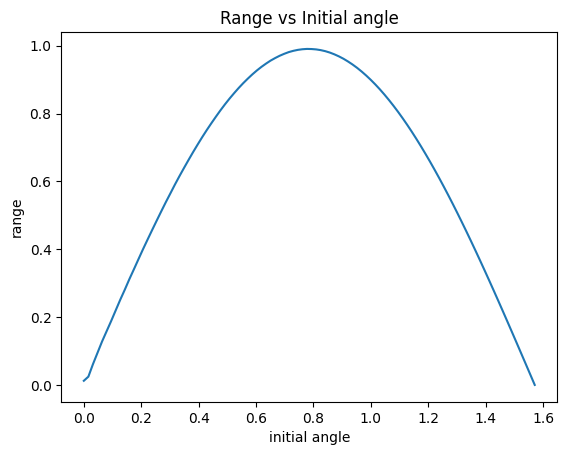

In [17]:
def calc_range (u, init_theta):
    def calc_r (r):
        to_return = ((u*r*(u*math.sin(init_theta)+1))/math.cos(init_theta))+math.log(1-(u*r)/math.cos(init_theta))
        return to_return
    return bisection(calc_r,math.pow(10, -10), (math.cos(init_theta)/u)-math.pow(10, -10), math.pow(10, -8))

#xvalues  = np.linspace(0+ math.pow(10, -17),90- math.cos(init_theta)/u, 200)
#xvalues = np.linspace(0+ math.pow(10, -17),90 - math.pow(10, -17) , 200)
xvalues = np.linspace(0+math.pow(10, -10),math.pi/2 - math.pow(10, -10) , 100)

yvalues = np.array([calc_range(0.01, x) for x in xvalues])
plt.plot(xvalues, yvalues)
plt.xlabel("initial angle")
plt.ylabel("range")
plt.title ("Range vs Initial angle")
plt.show()


Earlier we were able calculate the range of a projectile for a given initial angle and u. We have now modified it accept user input for those values to calculate the range of a projectile with the influence of drag force on it. We accomplished this by nesting a function definition inside inside another. 
The biggest challenge here was to come up with universal initial bracketing that would work for any valid user input. We know that range of a projectile is 0 when the initial angle is 0 or $\frac{\pi}{2}$ hence we defined a very small value $\delta = 10^{-10}$ which would prevent our bisection function from getting to those extreme problematic points. hence our lower limit for the bracketing is $\delta$. Looking at the transcendental equation to calculate the range, we know that ln(negative number ) is imaginary hence $1 - \frac{ur}{\cos\theta_0} >0$

Therefore $\frac{\cos(\theta)}{u} > r$. This should be our higher limit for bracketing but we cannot be in a situation where $\theta_{0} = 90$. to prevent that we set our higher limit to $\frac{\cos(\theta)}{u} - 10^{-10}$

We use our bisection function with this bracketing to calculate the range and plot the relation between range and initial angle. 

### * Part 3: Graphs

<font color = blue>
Use this function to make a single plot showing four curves: $r(\theta_0)$ vs. $\theta_0$ for $u = 0.5, 1.0, 2.0, 4.0$.  Let $\theta_0$ range from $0.01$ to $\frac{\pi}{2} - 0.01$ (as the endpoints are tricky).  Remember to label your plot thoroughly (including a legend), and discuss the results physically.

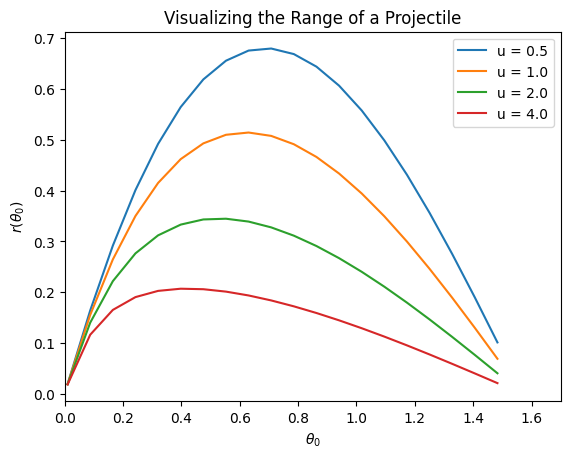

In [18]:
def data_generator2(theta, u, P):
    y_values = np.zeros(P)
    new_theta = theta
    for i in range(P):
        y_values[i] = calc_range(u, new_theta)
        new_theta += ((math.pi/2) - 0.02)/P
    return y_values

y_values1 = data_generator2(0.01,0.5, 20) #smaller u has a hgher range as less drag
y_values2 = data_generator2(0.01,1.0, 20)
y_values3 = data_generator2(0.01,2.0, 20)
y_values4 = data_generator2(0.01,4.0, 20)
 
x_values = np.zeros([20])
new_theta = 0.01
for i in range (20):
    x_values[i] = new_theta
    new_theta += ((math.pi/2) - 0.02)/20
    
plt.plot(x_values,y_values1,label ="u = 0.5")
plt.plot(x_values,y_values2,label ="u = 1.0")
plt.plot(x_values,y_values3,label ="u = 2.0")
plt.plot(x_values,y_values4,label ="u = 4.0")
plt.xlabel("$\\theta_{0}$")
plt.ylabel("$r(\\theta_{0})$")
plt.title ("Visualizing the Range of a Projectile")
plt.xlim(0, 1.7)
plt.legend()
plt.show()


This graph shows the difference between the projectile distance $(r(\theta_{0}))$ and the initial angle ($\theta_{0}$). If we ignore drag force, the graph peaks at $45^{\circ}$ as in a no drag situation, $45^{\circ}$ is the optimal launch angle for a projectile. If the projectile is thrown at an initial launch angle $> 45^{\circ}$ then the projectile goes higher and has a higher potential. Because of this higher potential, the projectile tends to drop faster and reach terminal velocity at a larger height thereby having a smaller range. If the projectile is thrown at an initial angle $< 45^{\circ}$ then the projectile wont stay in air much longer and get pulled down much faster leading to a smaller range. We also know that at an initial angle of 0 and $\frac{\pi}{2}$, our range would be 0 as sin(0 or  $\frac{\pi}{2}$) is 0. 
That graph above shows the relationship between initial angle at a given value of u and the range of the projectile. The graphs clearly show that this air drag is not being ignored as the maximum range (peak) is not at $45^{\circ}$ but a tiny bit pulled back leading to an asymmetric parabolic graph. 

# Any Other Problem : The Energy Quantization Condition

<font color = blue>
Find a physical problem different from the ones discussed above that requires either a numerical root finder or numerical integration to complete.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.

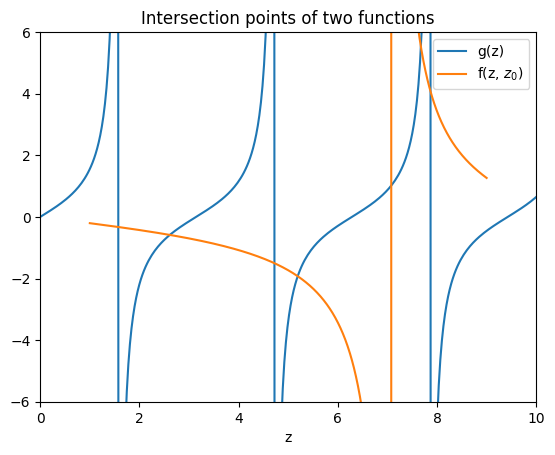

6.827142005884768
26.951445478267043
58.904615174640966
96.28692841600216


In [19]:
def f1 (z, z_0):
    toreturn = math.sqrt((z_0**2/(z**2))-1)/(1-(z_0**2/(2*z**2)))-math.tan(z)
    return toreturn
    
def f2(z):
    return f1(z, 10)

def bigfunction(z, z_0):
    return math.sqrt((z_0**2/(z**2))-1)/(1-(z_0**2/(2*z**2)))
def tanfunction(z):
    return math.tan(z)

xvalues = np.linspace(1, 9, 1000)
yvalues1 = np.array([bigfunction(x, 10) for x in xvalues ])
x = np.linspace(-5 * np.pi, 5 * np.pi, 1000)
plt.plot(x, np.tan(x), label = "g(z)")
plt.ylim(-6, 6)
plt.xlim(0, 10)


plt.plot(xvalues, yvalues1, label = "f(z, $z_{0}$)")
plt.legend()
plt.xlabel("z")
plt.title("Intersection points of two functions")
plt.show()

e1_calc = bisection(f2, 2,3, math.pow(10, -8))
e2_calc = bisection(f2, 5,6, math.pow(10, -8))
e3_calc = bisection(f2, 7.5,8, math.pow(10, -8))
e4_calc = bisection(f2, 9.5,10, math.pow(10, -8))

print(e1_calc**2)
print(e2_calc**2)
print(e3_calc**2)
print(e4_calc**2)


An infinite squarewell can be defined as 
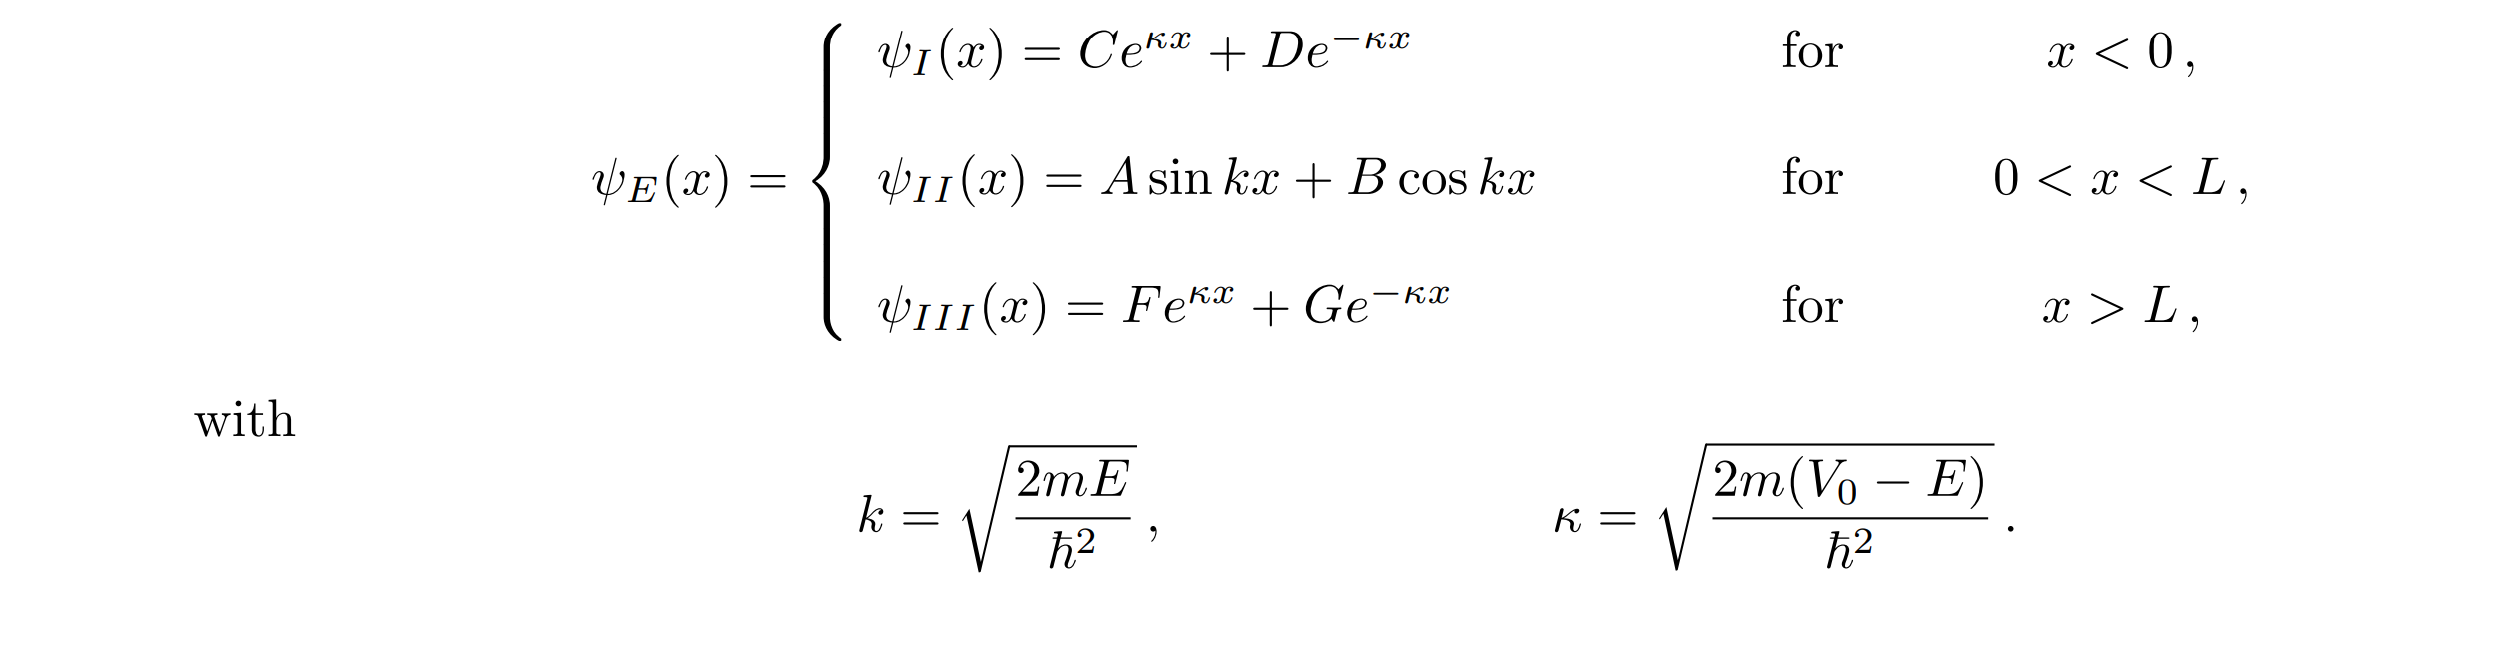

The first step is to apply the boundary conditions at infinity and calculate the value of the unknown constants, we get the following
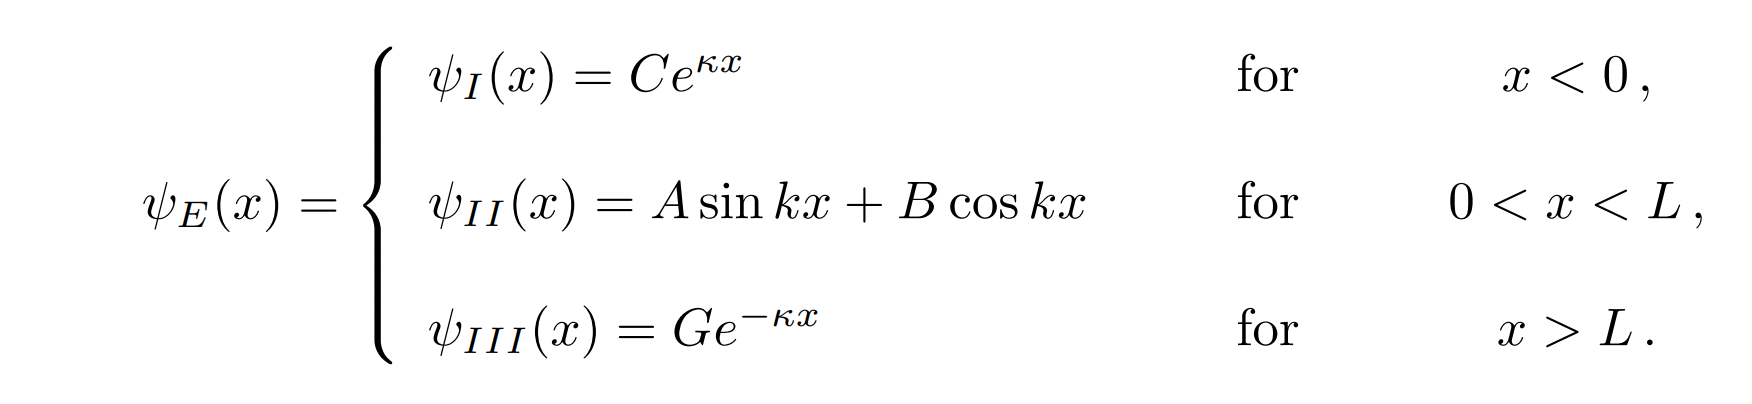
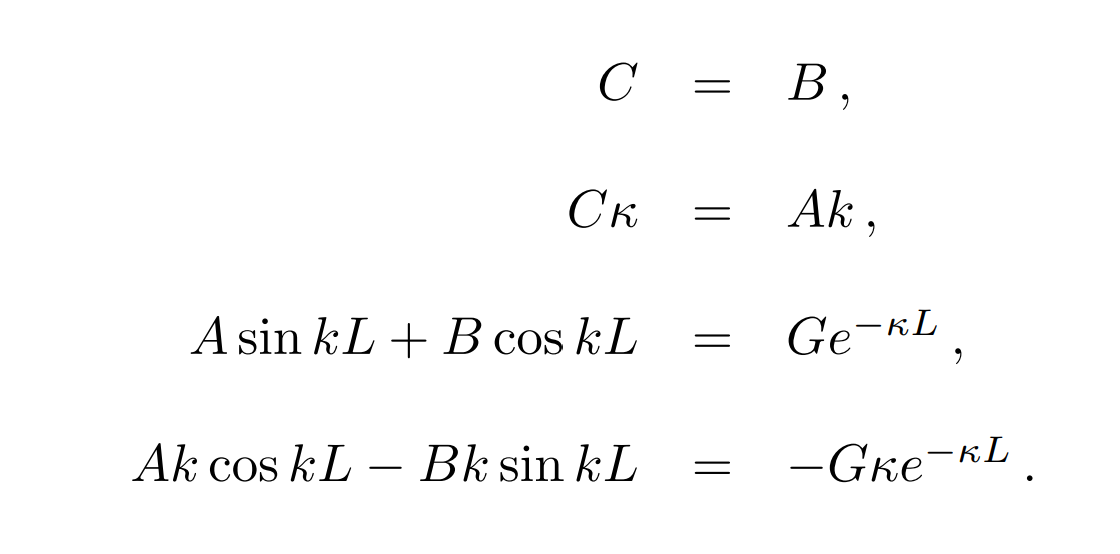

On solving this further we get, 
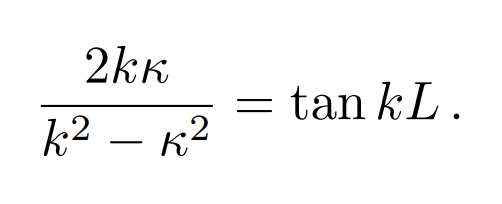 [1]


This simplifies our previous equations to 
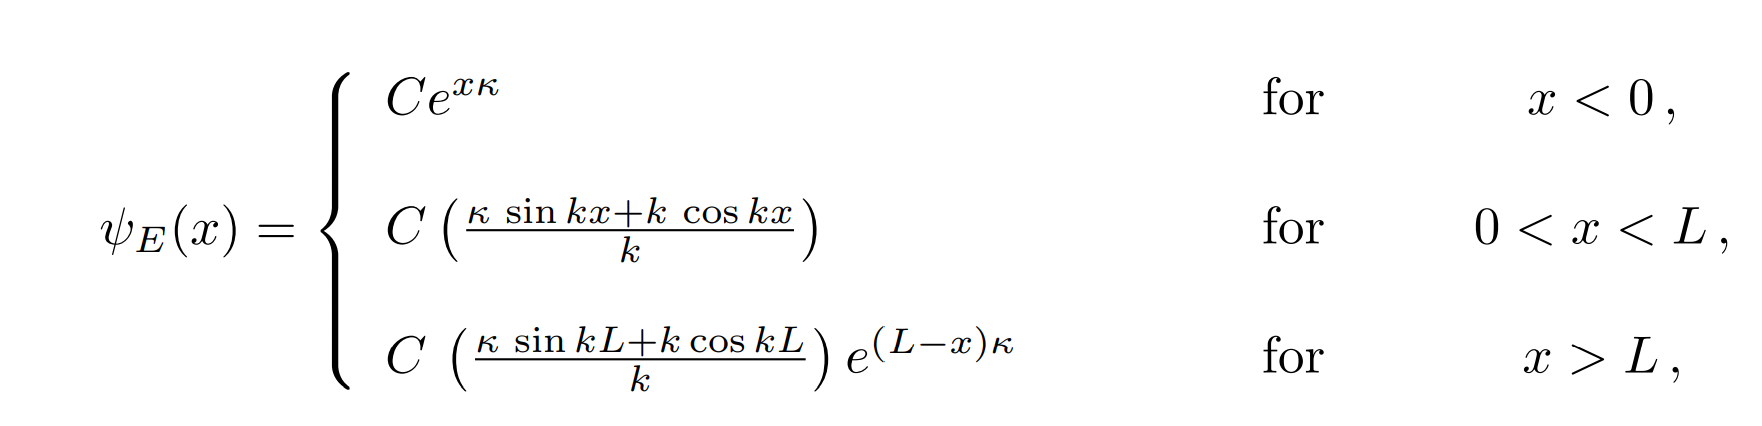

We now go back to equation  [1] where we define another constant z as 
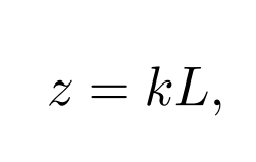
which then makes equation [1] much readable as 
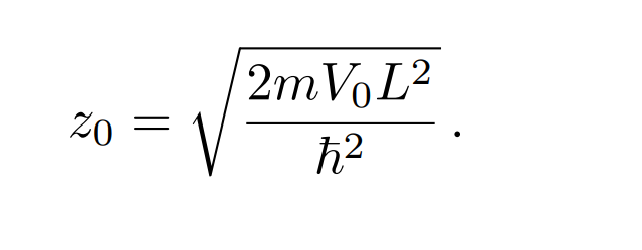
Here $z_{0}$ depends in the mass of the particle (m) the potential of the well ($V_{0}$) and length of the well $L$

using this and the relation of $k$ and $\kappa$ from equation 1, we get 
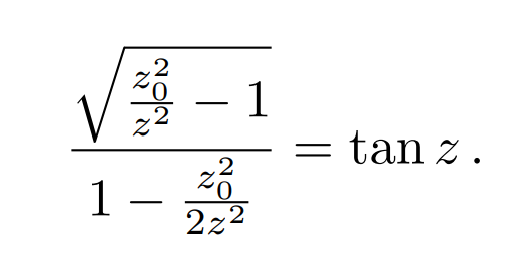 [2]


This equation allows us to compute the energy of a wave function to be 
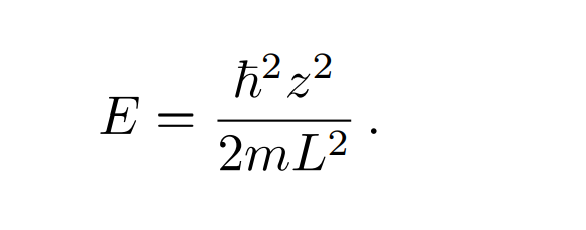
But equation [2] is a transcendental equation hence cannot be solved using pen and paper. We can use our bisection algorithm to solve for the value of z at setting $z_{0}=10$
We can define our bracketing for all 4 intersection points by examining the plot above. We know that the roots are in the x range of (2, 3), (5,6), (7.5, 8), (9.5, 10). On using our bisection function we get the solution to this transcendental equation to be z  = 6.827142005884768, z = 26.951445478267043, z = 58.904615174640966, z = 96.28692841600216. We can verify these values from our previously calculated values shown in the equation below
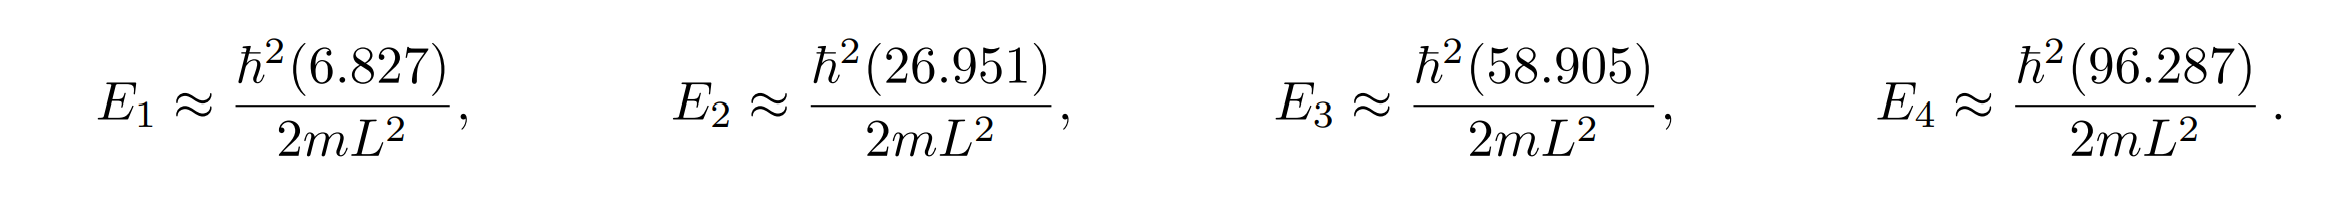
All four energy levels use the same values of z that we determined earlier using bisection

Collaborated with the entire class. equation snippets and explanation taken from phy 220 class notes. 